In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from datetime import datetime

In the course of planning previous gatherings during the COVID-19 pandemic, the big question on my mind (and probably every attendee's mind) was: "can we gather people safely in the context of this pandemic?" and, "regardless of safety, is it *appropriate* to gather people during the pandemic?". The first is a more quantitative question, the second is more moral. For the benefit of those who might be invited to gather during COVID-19, I'd like to put forth some thoughts on these topics&mdash;hopefully provoke discussion&mdash;in the order they appear.

It may seem biased to consider the quantitative safety of gathering before the superseding question of whether gathering is approprate *at all*, but I think numbers provide helpful context when determining just how rigid our morals are. Regardless, COVID-19 data in particular&mdash;and how it might be usefully interpreted by regular folks&mdash;is frustratingly opaque and we might learn something beyond the safety of a gathering by its analysis.

To decide whether we can gather people "safely" during this COVID-19 pandemic, we first have to acknowledge that any gathering will incur some additional risk of COVID exposure/spread/infection beyond the normal risks inherent in daily (quarantined) life. So the question is *really*, what is the risk of exposure posed by gathering and do we feel that risk is low enough to call a gathering "safe"? It's much easier to work out a number estimate of risk than it is to decide if that number is "low", "high", "scary" or "safe", but we can draw from our own instinct as well as decision making criteria in science to help with that determination.

The main point of quarantine behavior is to avoid contact with COVID (+) people&mdash;that's the only way to assure there is zero chance of having COVID transmitted to you, or you transmitting it to someone else&mdash;so we ought to try to calculate the probability that we are successful or unsuccessful in avoiding COVID (+) people despite gathering together. To begin, let's get some data. As an example, I'll work with data provided for Los Angeles county on their COVID19 Surveillance website (http://dashboard.publichealth.lacounty.gov/covid19_surveillance_dashboard/)

In [2]:
#file downloaded from source above
file = '20201214_LA_County_Covid19_cases_deaths_date_table.csv'

#open the data here
df = pd.read_csv(file)

#get rid of possibly unreliable most recent information
df = df.drop(0, 'index')

In [3]:
def get_date (string):
    """
    This takes a text string date and turns it into a more useful datetime format
    """
    try:
        time = datetime.strptime(string, '%m/%d/%Y')
    except:
        time = datetime.strptime(string, '%Y-%m-%d')
    return time

In [4]:
#convert the dates in the original data to something easier to use
df['date'] = df['date_use'].apply(get_date)

#get rid of unnecessary columns and make it look nice
df = df.drop(["Unnamed: 0", "date_use"], axis=1)
cols = list(df.columns)
df = df[[cols[-1]] + cols[:-1]]

Below is a plot of the most recent case and death data from LA county. I've excluded the most recent date's entry (possibly today) since it may be incomplete. We can see a distinct periodicity to the results. Approximately every 7th day (10/18, 10/25, 11/2, 11/8, 11/15, 11/22...) there is a drop in confirmed COVID cases for reasons I don't understand and won't try to explain here. During the intervening days, case numbers are more or less constant. This trend is broken during Thanksgiving week (11/23-11/29), when we can assume people were either gathering&mdash;"safely" or otherwise&mdash;or having a quarantined Thanksgiving, **not** getting tested. Some fraction of the huge spike in COVID cases observed in the following week (~9k cases on 11/30 and 12/1) could be interpreted as the shifting of the cases we might have observed in Thanksgiving week onto those days; they aren't *all* necessarily a massive travel and unsafe gathering-induced case wave. The even giganter-er case spike in the week of 12/7 tells us what the real trend is. However Thanksgiving affected testing and the collection of daily case data, there is a clear trend of what appears to be exponential growth in daily cases. 

Text(0, 0.5, 'daily new cases')

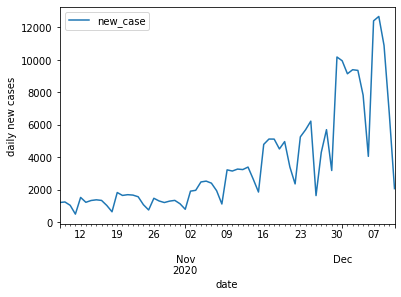

In [5]:
df.head(65).plot(x='date', y='new_case')
plt.ylabel('daily new cases')

Here's a look at the raw numbers as well as the other values being tracked over the last 14 days. The media and most COVID surveillance websites that I've seen overemphasize the *total* number of COVID-19 cases reported over *all time* ("total_cases" in the table below), which looks big and scary, but is not actually an informative piece of information. The value we care about when planning a gathering is "daily new cases" ("new_case" in the table below), but only new cases over the last couple weeks. The infectious period for someone with COVID-19 is ~14 days, meaning only people who tested positive within the last 14 days could be *active* spreaders of disease.

In [6]:
tot = df.head(14)['new_case'].sum()
print('Total new cases (considered currently active cases) over the last 14 days: ', tot)
df.head(14)

Total new cases (considered currently active cases) over the last 14 days:  113527


,date,total_cases,new_case,avg_cases,total_deaths,new_deaths,avg_deaths
1,2020-12-11,499900,2067,8090.0,7864,7,36.0
2,2020-12-10,497833,6715,9131.0,7857,32,40.0
3,2020-12-09,491118,10887,9513.0,7825,27,43.0
4,2020-12-08,480231,12675,9264.0,7798,41,44.0
5,2020-12-07,467556,12404,8874.0,7757,61,44.0
6,2020-12-06,455152,4057,8556.0,7696,38,41.0
7,2020-12-05,451095,7826,8432.0,7658,43,39.0
8,2020-12-04,443269,9352,8128.0,7615,38,38.0
9,2020-12-03,433917,9393,7406.0,7577,52,36.0
10,2020-12-02,424524,9144,6299.0,7525,36,32.0


Now that we have the raw data for the county, we can start estimating the risks of gathering people together. The way we will do this is:

-**First**, calculate the probability that a person in a region (in this case LA county) is an *active* COVID case using the 14 day new case total we found above. We assume that every person in the county is just like every other person and thus has the same probability of being COVID (+). Whether or not we would consider ourselves or other groups a privileged group (based on socioeconomic status, job type etc.) with lower than average risk of being COVID (+), the determination of increased/decreased risk would be arbitrary, overcomplicated, and introduce significant risk of *MAN'S HUBRIS* blinding us to true risks we all face as residents of our region. Thus we assume that "I am he as you are he as you are me and we are all"...the same.

The data reported around the country for COVID is almost always *confirmed cases*, which means the number of positive tests reported in the region. But the number of *actual* cases in a region will almost certainly be greater than the number of *confirmed* cases due to the possibility of asymptomatic (probably untested) infection, poor test availability, or social factors that would keep people&mdash;even sick people&mdash;from getting tested. So we'll make a guess at how many times more actual cases there are than confirmed cases and multiply our calculated infection probability by that number. This is usually called an *ascertainment bias*.

-**Second**, we treat the gathering of many people like a collection of flipped coins, in which each person's COVID-19 status is the result of a very biased coin flip (not 50-50) with heads representing COVID (+) and tails COVID (-). The bias of the coin&mdash;the probability of a head&mdash;is exactly the probability of active infection we calculated in the first step. In the language of probability and statistics, this is called drawing from a binomial distribution or modeling a system using a binomial distribution.

The calculation we'll make using this model is:

    What is the probability that NOBODY at a gathering is an active COVID case?
    
The opposite side of this calculation is, "what is the probability that AT LEAST one person at a gathering is an active COVID case?"

Up to this point, the steps taken are not the first analysis of this type to be publicly available. There is a great tool available from Georgia Tech (Georgia Institute of Technology) that implements this exact process to determine gathering risk in every county in America (https://covid19risk.biosci.gatech.edu).

-**Third**, we look to medical statistics literature (which is really just regular statistics literature) about disease screening tests&mdash;the ones you can hopefully get in your region&mdash;and calculate the probability that someone is an active COVID case even *after* they have received a negative test result. It is important to emphasize that all tests have the possibility to return false positives or negatives, and a negative test is *not* a confirmation that someone is not infected. This step will tell us just how much a negative test tells us about our COVID status.

Then we will rerun the binomial model to answer the new question:

    What is the probability that NOBODY at a gathering is an active COVID case after everyone has tested negative for COVID?

## First: probabillity that a person is an active case

In [7]:
#total number of active cases is determined above

#roughly LA county population
la_pop= 10*10**6 #that's 10 million

#probability of active case, also known as pre test probability
pre_prob = tot/la_pop

#ascertainment biases, multipliers of confirmed cases to estimate actual pre-test probability in total pop
    #GA Tech estimates from blood test data a bias of 10, meaning there are 10x more actual cases than positive tests
a_biases = [1, 5, 10, 20]

In [8]:
print('1) Probability that anyone in LA county is an active COVID case: ', pre_prob * 100, '% \n')
print('2) Probability that anyone is an active COVID case assuming 10x more cases than positive tests: ', pre_prob * 10 * 100, '%')

1) Probability that anyone in LA county is an active COVID case:  1.13527 % 

2) Probability that anyone is an active COVID case assuming 10x more cases than positive tests:  11.3527 %


We've divided the number of active cases in LA county by the population of LA county to get the probability that any one person in the county is an active covid case. That number is "1)" above and it's pretty small! With the recent rise in daily case rate, this is probably the highest probability of being a COVID-19 case we have seen yet. Even when cases are on a scary rising trend, still ~1% of the population are testing COVID (+). This number will go out of date really quickly as case numbers rise (or fall).

That's not the whole story. The probability in "1)" is actually something less impactful, nothing more than "the probability of being someone who has received a positive COVID test" or something like that. That doesn't say much. So now let's take Georgia Tech's assumption that there are 10x more *actual* cases than *confirmed* cases, see "2)". That gives us a probability of being actively COVID (+) greater than 10%. That's big! Percentages are sometimes hard to interpret; this would mean that in an ideal sample of LA county people, 11 of 100 would be COVID (+). That might make you feel a bit suspicious of any people you interact with day to day.

## Second: probability that NOBODY in a group is COVID (+)

The story told by an event or system can guide you to the best choice of probability distribution to use to model the event/system. In the case of a COVID gathering, we have a bunch of independent people who have two possible states: COVID (+) or COVID (-), we have an estimate of the probability of each state in each individual and we want to model the probability that various numbers of people in the group are COVID (+). That sounds like a group of flipped coins to me, and we want to model the probability that various numbers of coins turn up heads. That's the story of the binomial distribution. The distribution is pictured below, we'll consider a "success" in this case to be COVID (+) status.

![binom equation](binomial-distribution-formula.png)

In the limiting case we're considering, that of 0 "successes" or 0 COVID (+) people in a group of size *n*, the equation reduces to:

![binom limiting case](binomial-0_eq.png)

In [9]:
#define a function to calculate the probability of 0 COVID cases in a group
def prob_nobody_has (rate, group_size):
    
    return (1-(rate))**group_size

In [10]:
#calculate probabilities for a range of group sizes and ascertainment biases

full = []
for s in range(1,31):
    data = {bias: prob_nobody_has(pre_prob*bias, s) for bias in a_biases}
    full.append(pd.DataFrame(data, np.array([s])))
    
df_pre = pd.concat(full)
df_pre.index.name = 'group_size'
df_pre.rename_axis("ascert_bias", axis="columns", inplace=True)

In [11]:
df_pre.head()

ascert_bias,1,5,10,20
group_size,,,,
1,0.988647,0.943237,0.886473,0.772946
2,0.977423,0.889695,0.785834,0.597446
3,0.966327,0.839193,0.696621,0.461793
4,0.955357,0.791557,0.617536,0.356941
5,0.944511,0.746626,0.547429,0.275896


Above is a table with the probabilities of a COVID-free gathering up to a group of 5 (it goes out to 30 total). Below is a plot of that table, comparing group size and the probability of having *zero* COVID (+) group members, using the probabilities we just estimated in section 1 and the equation pictured above. Each curve is calculated using a different ascertainment bias, the <span style="color:blue">blue</span> one is a bias of 1 or no bias at all, just using the raw probability of being a *confirmed* case by testing. The <span style="color:green">green</span> curve represents a bias of 10x, the value assumed by GA Tech. The <span style="color:purple">purple</span> line is set at 95% probability of the group being fully COVID free.

We can see that with increasing group size, the probability of being fully COVID free drops precipitously (it's actually *exponentially*). As we assume that *actual* cases exceed *confirmed* cases by larger ascertainment biases, even a single person becomes less than 95% certain to be COVID (-) by themselves. 95% probability is an arbitrary threshold to meet to say a group is "safely" COVID free&mdash;it's frequently used in science, but usually for garbage reasons or no reason at all. Discussion is warranted to decide what a group's specific risk tolerance is.

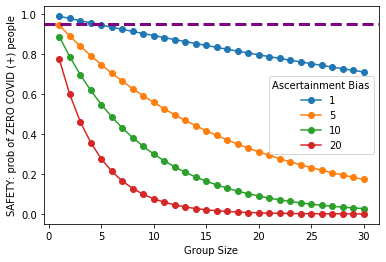

In [12]:
#draw a plot
[plt.plot(df_pre.index, df_pre[b], marker='o') for b in a_biases]
plt.legend(title='Ascertainment Bias', labels=a_biases)
plt.xlabel('Group Size')
plt.ylabel('SAFETY: prob of ZERO COVID (+) people')

plt.axhline(0.95, linestyle='--', color='purple', linewidth=3)

Let's pin a specific number on our gathering and its probability of safety.

Our gathering has an invite list of 13, which with an acertainment bias of 10x, has only a

In [13]:
print(df_pre.loc[13,10]*100, "%")

20.876210264310625 %


chance of being safely COVID free.

That probability of safety is really low and definitely outside my personal comfort zone. Only a bias of 1, or the assumption that there are *no* additional cases beyond those confirmed by testing (not very realistic), has a remotely comfortable probability of leaving our gathering COVID free.

If this were the end of the story, the gathering would be too unsafe for comfort and it would be terminated, before considering any moral quandary.

## Third: what if everyone has tested COVID (-)?

Now onto the most terribly explained topic in all of medical school education: sensitivity, specificity, positive/negative predictive value and the larger world of diagnostic statistics. Apologies for the large amount of text.

The main point of this section is the demonstration that for all but the best diagnostic tests, from biopsy results to physical therapy ACL tear tests, a negative result is not a *confirmation* that one is condition-free (and vice-versa). Tests of the tests themselves give us quantitative information about how "good" the test is; we'll use the information about "standard" RT-PCR COVID-19 tests to post-process the values we calculated in the above sections to find out how likely someone is to be an active COVID case *after* receiving a negative COVID test.

COVID test results can be sorted into 4 categories:

    -True positives (x) - a positive result from someone who actually has COVID

    -False positives (z) - a positive result from someone who doesn't have COVID

    -True negatives (j) - a negative result from someone who doesn't have COVID

    -False negatives (y) - a negative result from someone who actually has COVID

These can be summarized in a table (apologies if the handwriting is hard to interpret):

![true and false results table](medical_test_statistics_table.png)

If a population with and without COVID is tested using some screening test like the RT-PCR tests done on saliva/nasal mid-turbinate/nasopharyngeal samples, we can collect real numbers for each of the values *x*, *y*, *z*, and *j* above. Using those numbers we can calculate the named probabilities listed above (sensitivity, specificity, etc.). Results like these are usually collected and reported by laboratories in scientific papers that you can hopefully find on the internet.

To make it really clear, *sensitivity* is how good the test is at identifying real cases. *Specificity* is how good it is at identifying non-cases. The predictive values are more complicated, but are more relevant to our analysis. They tell you your new probability of being COVID (+) or (-) after receiving a (+) or (-) test. Great right?

Unfortunately, the raw predictive values taken from a literature source will probably not be valid for us because the source's data comes from a different population than the population we care about (e.g. us). Even though it's the same test being used for both populations, we have to take one additional step.

We instead compute odds and likelihood ratios. These are similar to probabilities, but instead *compare* the likelihoods of getting (+) or (-) test results, or the likelihoods of being COVID (+) or COVID (-). They also happen to be basically the same thing as gambling odds you see for horse races or presidentical elections or sports matches. Odds and likelihood ratios are expressed [# of outcomes of type A] : [# of outcomes of type B] said "A to B", they are related to probability in that the probability of outcome A is [# A] / [# A  +  # B].

Below is a figure describing the whole process of computing odds, likelihood ratios and the final *post-test* probability of COVID.

![likelihood transformation](likelihood_transformation.png)

Curative Inc. (https://curative.com/) runs testing for LA county. They direct collection of testee-collected saliva samples from testees and perform an RT-PCR amplification to check if COVID RNA is present (What is RT-PCR?: https://tinyurl.com/t428ptt).

Per their FDA Emergency Use Authorization info summary (https://www.fda.gov/media/137089/download), their test&mdash;administered the way it is at their high-volume drive-through testing sites and compared to RT-PCR of deep nasopharyngeal swab samples as a "gold standard"&mdash;is **65.2% sensitive (15/23) and 80.9% specific (17/21)**. Also from their data, when saliva sampling is specifically observed and directed by a physician, it is 100% sensitive and specific.

Their sample population is rather small (~20 unobserved, ~50 observed) for something as important and money making as large scale COVID screening. Curative seems to have the contract for testing at sites in LA county, perhaps more regions. The level to which testees are observed and directed may vary widely between the drive-thru and walk-up testing sites in LA county, so it may be best to assume the *least* sensitivity and specificity to be conservative in our analysis. Their website touts 90% sensitivity and 100% specificity; these results are not reported in the EUA summary and are not supported by the data in that summary. I have no idea where they get these values reported on their website front page.

Ok! Now that we have all that info, let's quickly process our initial *untested* probabilities of having COVID, subject to the ascertainment biases we've considered, into the probabilities of having COVID *after* receiving a negative test result.

In [14]:
def post_test_transform (pre_test_prob, sens, spec):
    """
    Implementing the calculations to transform a pre-test probability into a modified post-test probability
    
    This specifically only implements the calculations for a NEGATIVE TEST
    """
    
    disease_odds = pre_test_prob / (1 - pre_test_prob)
    
    likelihood_neg = (1 - sens) / spec
    
    transformed_odds = disease_odds * likelihood_neg
    
    post_test_prob = transformed_odds / (1 + transformed_odds)
    
    return post_test_prob

In [15]:
# curative saliva swab unobserved params
cur_noobs_sens = 15/23
cur_noobs_spec = 17/21

In [16]:
#calculate post negative test probabilities for a range of group sizes and ascertainment biases
#using unobserved curative saliva swab test

full = []
for s in range(1,31):
    data = {bias: prob_nobody_has(
                    post_test_transform(
                        pre_prob*bias, cur_noobs_sens, cur_noobs_spec), s) for bias in a_biases}
    full.append(pd.DataFrame(data, np.array([s])))
    
df_post = pd.concat(full)
df_post.index.name = 'group_size'
df_post.rename_axis("ascert_bias", axis="columns", inplace=True)

In [17]:
df_post.head()

ascert_bias,1,5,10,20
group_size,,,,
1,0.995090,0.974795,0.947844,0.887930
2,0.990205,0.950224,0.898409,0.788419
3,0.985343,0.926274,0.851551,0.700060
4,0.980505,0.902926,0.807138,0.621604
5,0.975691,0.880168,0.765041,0.551941


Above are the probabilities of having a COVID free gathering in groups up to 5 (again it goes out to 30) AFTER everyone there has received a negative COVID test from the "standard" LA county Curative COVID test facilities. If we continue to assume there are 10x more actual cases than confirmed cases, each individual person, by getting tested and receiving a negative result, *decreased* their probability of *having* COVID from 9.7% to 4.4%. This halving of COVID risk for each person is exponentially magnified by group size when considering the probability of having a COVID free gathering. Here's a plot below to roughly illustrate the effect of COVID testing on group risk, "+" markers with dashed lines are the new results after negative tests. Below the plot we'll pin a new number on our gathering of size 13.

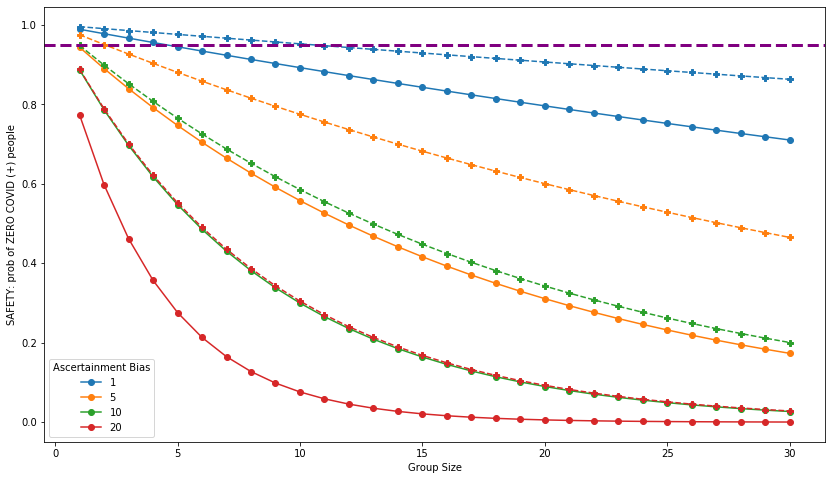

In [18]:
#draw a plot

    #make a big figure
fig = plt.figure(figsize=(14,8))

    #plot the pre-test probs
[plt.plot(df_pre.index, df_pre[b], marker='o') for b in a_biases]
    #plot the post-test probs
[plt.plot(df_post.index, df_post[b], marker='P', linestyle='--') for b in a_biases]

    #aesthetics
plt.legend(title='Ascertainment Bias', labels=a_biases)
plt.xlabel('Group Size')
plt.ylabel('SAFETY: prob of ZERO COVID (+) people')

        #make colors comparable
for l1, l2 in zip(fig.axes[0].lines[0:4], fig.axes[0].lines[4:8]): #it's ugly syntax, I know
    l2.set_color(l1.get_color())

plt.axhline(0.95, linestyle='--', color='purple', linewidth=3)

By getting everyone tested beforehand ("+" markers with dashed lines), we drastically increase the probability of a COVID free gathering, but rarely does that bump us above the 95% probability of safety (which again, is arbitrary). For our gathering of 13 with an ascertainment bias of 10x:

In [19]:
print('The probability of a COVID-free gathering increases from: ', df_pre.loc[13,10]*100, "% to: ", df_post.loc[13,10]*100, "%")

The probability of a COVID-free gathering increases from:  20.876210264310625 % to:  49.84023575523355 %


That's a huge "gain" of safety, but still leaves us with basically a 50-50 chance of having someone there with COVID and thereby creating a COVID exposure for everyone. 50-50 is hard to equate with "safe".

There are further assumptions that could be made that would increase the COVID-free probability, one simple one is considering co-dwelling attendees as a single unit since their states are likely tied. Whatever assumptions are made, the table of COVID free probability says it clearly: if you want to have a probability of gathering fully COVID free greater than 90% (even if everyone is tested), you have to end up with a group size (or effective group size after applying additional assumptions) of 2 or less.

At the very end of the document (maybe in an update), I will run the numbers assuming everyone gets the more sensitive and specific nasal swab tests, or gold standard nasopharyngeal swab tests, to see if that would change the probabilities much. I will also do a quick run though considering a gathering of peope from both LA County and Alameda county.


#### For now, the main point is clear; a negative saliva COVID test in LA county appoximately halves your risk of having COVID (9.7% to 4.4%). A group of 13 people increase the probability of their group being COVID free from ~20% (1 in 5) to ~50% (1 in 2) if they all receive negative COVID tests.

# But is is *appropriate* to gather at all?

Despite knowing how to interpret data and calculate the probability of safety, this doesn't automatically make it ok that we do so&mdash;even if we determined our gathering was 100% safe! In LA County, California and *some* places across the country, there are emergency rules in place restricting normal movement, social gatherings, and people's ability to work or engage in day to day activities. Breaking those rules may not carry any real consequences from law enforcement or what-have-you, but does carry real risk of transmitting disease and contributing to this public health crisis. In conversations with various folks, a number of important non-quantitative topics have come up:

-**Is gathering against the rules a case of "rules for thee but not for me"?** We are quick and happy to shred Rudy Giuliani, D-Trump and regular people caught on camera for acting in ways that would violate the COVID safety rules we have in our regions. Sure we did the math, but does that exempt us from following the rules ourselves? I think this question begets at least one interesting question:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
People in less fortunate situations are suffering during this pandemic for a lot of reasons. Gathering mostly safely is a special luxury many can't create or afford. On the other hand, gathering unsafely is a financial requirement for lots of "essential" workers. Everybody's best interest is served by the hastened end to the pandemic. It is a pure expression of privilege to gather against the rules, how does that affect our decisions?

-**What happens in the very possible situation that one or all of us gets COVID as a result of gathering?** Peope like celebrities and politicians&mdash;people with great access to information and safety precautions&mdash;are getting COVID left and right, probably by having events a lot like this one, with similar testing procedures. The whole point of the numbers above are to demonstrate that there is a significant non-zero probability of being exposed to COVID from a group member. Asymptomatic infection and false negatives really do exist; it is really possible to transmit infection even if you feel normal and you test negative. The responsibility we carry by voluntarily opening ourselves to infection is that *any infection stops with us*. Everbody needs to be absolutely sure they will not spread disease outside their household in the unfortunate case that they are infected.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Are there professional or social consequences of getting COVID? I haven't seen much discussion of the stigma of COVID infection, if there is any. Maybe it would be damaging in ways beyond biological to report an exposure or infection to your employer, family or friends. It might be especially bad if it is somehow learned that it was a result of breaking rules and gathering between households. Everyone's situation will be different, but it might be worth thinking about how other parts of your life might be affected by such bad luck.